## Exploratory Data Analysis Lab

Estimated time needed: **30** minutes

In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis. You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.

### Objectives

* In this lab you will perform the following:
* Identify the distribution of data in the dataset.
* Identify outliers in the dataset.
* Remove outliers from the dataset.
* Identify correlation between features in the dataset.

### Hands on Lab

Import the pandas module.

In [1]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [4]:
print(df['ConvertedComp'].dtypes)

float64


In [5]:
df['ConvertedComp'].head(5)

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

In [6]:
df['Age'].isnull().value_counts()

False    11111
True       287
Name: Age, dtype: int64

In [7]:
age_median = df['Age'].median()
df['Age'].replace(np.nan, age_median, inplace=True)
df['Age'].isnull().value_counts()

False    11398
Name: Age, dtype: int64

In [8]:
df['Age'].median()

29.0

## Distribution

Determine how the data is distributed
The column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.

Plot the distribution curve for the column ConvertedComp.

In [9]:
%%capture
! pip install seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df['ConvertedComp'].isnull().value_counts()

False    10582
True       816
Name: ConvertedComp, dtype: int64

In [11]:
df.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
len(df)

10582

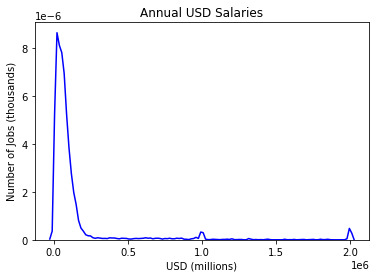

In [12]:
sns.distplot(df['ConvertedComp'], hist=False, color='b')
plt.title('Annual USD Salaries')
plt.xlabel('USD (millions)')
plt.ylabel('Number of Jobs (thousands)')

plt.show()

Plot the histogram for the column ConvertedComp.

Text(0.5, 1.0, 'Annual USD Salaries Histogram')

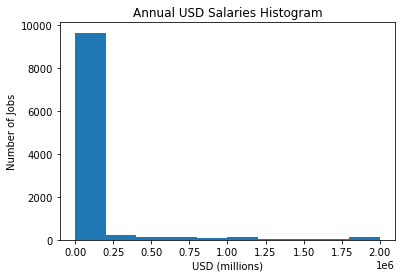

In [13]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["ConvertedComp"])

plt.pyplot.xlabel("USD (millions)")
plt.pyplot.ylabel("Number of Jobs")
plt.pyplot.title("Annual USD Salaries Histogram")

What is the median of the column ConvertedComp?

In [14]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a Man?

In [15]:
df['Gender'].value_counts()

Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

In [16]:
df['Gender'].isnull().value_counts()

False    10512
True        70
Name: Gender, dtype: int64

In [17]:
df['Gender'].replace(np.nan, 'Man', inplace=True)
df['Gender'].isnull().value_counts()

False    10582
Name: Gender, dtype: int64

Find out the median ConvertedComp of responders identified themselves only as a Woman?

In [18]:
import statistics
median = []
for i, j in zip(df['ConvertedComp'], df['Gender']):
    if j == 'Woman':
        median.append(i)
print(statistics.median(median))

57708.0


Give the five number summary for the column Age?

In [19]:
df['Age'].min()

16.0

In [20]:
df['Age'].quantile(0.25)

26.0

In [21]:
df['Age'].median()

29.0

In [22]:
df['Age'].quantile(0.75)

34.0

In [23]:
df['Age'].max()

99.0

Plot a histogram of the column Age.

Text(0.5, 1.0, 'Age Histogram')

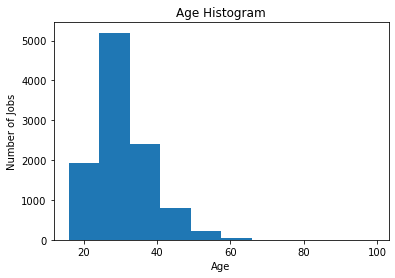

In [24]:
plt.pyplot.hist(df["Age"])

plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("Number of Jobs")
plt.pyplot.title("Age Histogram")

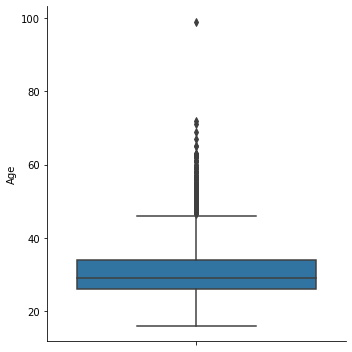

In [25]:
sns.catplot(y="Age", kind="box", data=df)

## Outliers

### Finding outliers

Find out if outliers exist in the column ConvertedComp using a box plot?

In [26]:
df['ConvertedComp'].median()

57745.0

In [27]:
df['ConvertedComp'].mean()

131596.7316197316

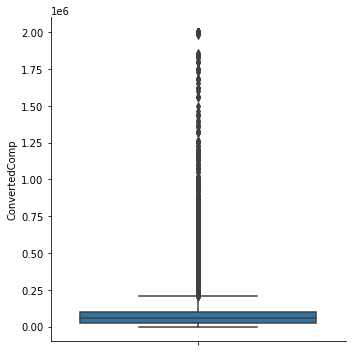

In [28]:
sns.catplot(y="ConvertedComp", kind='box', data=df)

Find out the Inter Quartile Range for the column ConvertedComp.

In [29]:
iqr = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
print(iqr)

73132.0


Find out the upper and lower bounds.

In [30]:
lower_bound = df['ConvertedComp'].quantile(0.25) - 1.5 * iqr
lower_bound

-82830.0

In [31]:
upper_bound = df['ConvertedComp'].quantile(0.75) + 1.5 * iqr
upper_bound

209698.0

Identify how many outliers are there in the ConvertedComp column.

In [32]:
count = 0
for i in df['ConvertedComp']:
    if i > upper_bound:
        count += 1
print(count)

879


Create a new dataframe by removing the outliers from the ConvertedComp column.

In [33]:
new_df = df[df['ConvertedComp'] < upper_bound]
len(new_df)

9703

In [34]:
new_df['ConvertedComp'].max()

209356.0

In [35]:
new_df['ConvertedComp'].median()

52704.0

In [36]:
new_df['ConvertedComp'].mean()

59883.20838915799

## Correlation

### Finding correlation

Find the correlation between Age and all other numerical columns.

In [37]:
df.dtypes.value_counts()

object     79
float64     5
int64       1
dtype: int64

In [38]:
df.columns.groupby(df.dtypes)

{dtype('int64'): Index(['Respondent'], dtype='object'),
 dtype('float64'): Index(['CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age'], dtype='object'),
 dtype('O'): Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
        'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
        'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
        'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
        'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
        'CurrencySymbol', 'CurrencyDesc', 'CompFreq', 'WorkPlan',
        'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
        'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
        'LanguageDesireNextYear', 'DatabaseWorkedWith',
        'DatabaseDesireNextYear', 'PlatformWorkedWith',
        'PlatformDesireNextYear', 'WebFrameWorkedWith',
        'WebFrameDesireNextYear', 'MiscTechWorkedWith',
        'Mis

In [39]:
numerical_cols = []
for i in df.columns:
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        numerical_cols.append(i)
print(numerical_cols)

['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age']


In [40]:
df[numerical_cols].corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013482,0.002181,-0.016178,0.007031,0.002849
CompTotal,-0.013482,1.000000,0.001037,0.003467,0.006698,0.007169
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.103693
WorkWeekHrs,-0.016178,0.003467,0.021143,1.000000,0.032463,0.031874
CodeRevHrs,0.007031,0.006698,-0.033865,0.032463,1.000000,-0.016452
Age,0.002849,0.007169,0.103693,0.031874,-0.016452,1.000000


## Authors

Ramesh Sannareddy

Other Contributors
Rav Ahuja

Change Log
Date (YYYY-MM-DD)	Version	Changed By	Change Description
2020-10-17	0.1	Ramesh Sannareddy	Created initial version of the lab
Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the MIT License.